In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

import ipywidgets as widgets
from IPython.display import display, Image
from itertools import product

## 1.총 이동량 비교

In [ ]:
T_dhtij = np.load('od_coarse_weekly.npy')
T_dht = T_dhtij.sum(axis=(3,4))

In [13]:
w_label_dict  = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'W.day_avg', 'W.end_avg', 'W.tot_avg']
w_color_dict  = ['darkviolet', 'orange', 'skyblue', 'green', 'peru', 'blue', 'red', 'midnightblue', 'deeppink', 'black']
w_marker_dict = ['', '', '', '', '', '', '', '.', '.', '.']

t_label_dict = ['Com.', 'Etc.', 'Tot.']
t_linestyle_dict = ['--', ':', '-']

def plot_hourly_flow(weekdays, move_types):
    fig, axes = plt.subplots(ncols=2, figsize=(12,6), gridspec_kw=dict(width_ratios=[4, 1]))
    ax_h, ax_tot = axes
    fig.tight_layout()

    ax_h.set_title('Out-going flow by hour')
    ax_h.set_ylabel('Hour'); ax_h.set_ylabel('Volume')
    ax_h.set_xticks(range(24)); ax_h.grid()

    ax_tot.set_title('(Mean over 24h)')
    ax_tot.tick_params(axis='x', bottom=False, labelbottom=False)
    [ax_tot.spines[loc].set_visible(False) for loc in ['top', 'right', 'bottom']]
    ax_tot.set_xlim(0, 1)

    for w, t in product(weekdays, move_types):
        T_dh = None
        T_h = None
    
        if t<2: T_dh = T_dht[:,:,t]
        else:   T_dh = T_dht.sum(axis=2)
        
        if w < 7:  T_h = T_dh[w]
        elif w==7: T_h = T_dh[0:5].mean(axis=0)
        elif w==8: T_h = T_dh[5:7].mean(axis=0)
        else:      T_h = T_dh.mean(axis=0)

        label = w_label_dict[w] + '(' + t_label_dict[t] + ')'
        line_params = dict(color=w_color_dict[w], marker=w_marker_dict[w], linestyle=t_linestyle_dict[t], label=label)
        ax_h.plot(range(24), T_h, **line_params)
    
        tot_volume = T_h.mean()
        ax_tot.plot([0.1, 0.5], [tot_volume,tot_volume], **line_params)
        ax_tot.text(0.55, tot_volume, label)
    if len(weekdays)*len(move_types) >0:
        ax_h.legend()
    plt.show()

In [ ]:
arr_checkboxes_weekday   = [widgets.Checkbox(value=False, description=label) for label in w_label_dict]
arr_checkboxes_move_type = [widgets.Checkbox(value=False, description=label) for label in t_label_dict]
output = widgets.Output()

display(widgets.HBox([
    widgets.VBox(arr_checkboxes_weekday[:7]),
    widgets.VBox(arr_checkboxes_weekday[7:]),
    widgets.VBox(arr_checkboxes_move_type),
]))
display(output)

W, Mask_weekdays   = np.arange(10), np.full(10, False)
T, Mask_move_types = np.arange(3),  np.full(3, False)

# Set initial values
Mask_weekdays[7:] = True
Mask_move_types[2] = True
for checkbox, val in zip(arr_checkboxes_weekday, Mask_weekdays):
    checkbox.value = bool(val)
for checkbox, val in zip(arr_checkboxes_move_type, Mask_move_types):
    checkbox.value = bool(val)

def handle_checkbox(change):
    with output:
        output.clear_output()
        checkbox_name = change['owner'].description
        try:
            Mask_weekdays[w_label_dict.index(checkbox_name)] = change['new']
        except:
            Mask_move_types[t_label_dict.index(checkbox_name)] = change['new']
        plot_hourly_flow(W[Mask_weekdays], T[Mask_move_types])
        
[checkbox.observe(handle_checkbox, names='value') for checkbox in arr_checkboxes_weekday]
[checkbox.observe(handle_checkbox, names='value') for checkbox in arr_checkboxes_move_type]

Output()

# 이동량 데이터

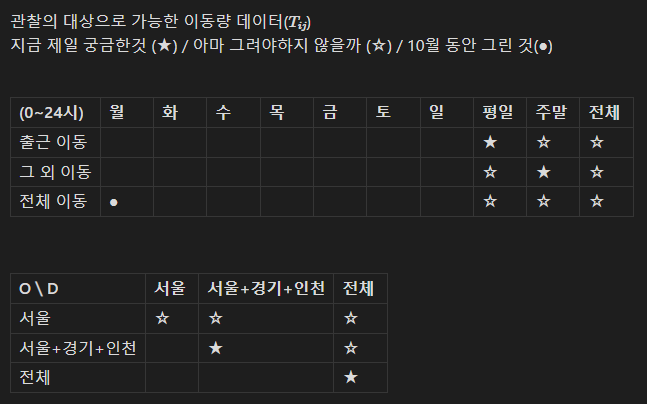

In [4]:
Image(open('img1.png', 'rb').read())